In [1]:
from astropy.table import *
import numpy as np
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u

## Random Point Catalog with Masking

In [2]:
cat_random_cosmos_uddd = Table.read('RandomCat_ECOSMOS_UVISTA.fits')
cat_random_cosmos_uddd = cat_random_cosmos_uddd[cat_random_cosmos_uddd['Layout_Vista']==0]
cat_random_cosmos_uddd = cat_random_cosmos_uddd[cat_random_cosmos_uddd['ra']>149.41]
cat_random_cosmos_uddd = cat_random_cosmos_uddd[cat_random_cosmos_uddd['Mask_COSMOS']>0]

cat_cosmos = Table.read('CUT2_CLAUDS_HSC_VISTA_Ks23.3_PHYSPARAM_TM.fits')
cat_cosmos = cat_cosmos[cat_cosmos['CLASS']==0]

# print(cat_random_cosmos_uddd.info())
print(len(cat_random_cosmos_uddd))

rand_ids = np.random.randint(len(cat_random_cosmos_uddd),size=3000)
rand_ids = np.sort(rand_ids)[::-1]
cat_random_randid = cat_random_cosmos_uddd[rand_ids]

516574


In [3]:
print(len(cat_random_cosmos_uddd))

for gal in cat_random_randid:
    cat_neighbors = cat_cosmos[abs(cat_cosmos['RA']-gal['ra'])<0.015]
    cat_neighbors = cat_neighbors[abs(cat_neighbors['DEC']-gal['dec'])<0.015]
    if len(cat_neighbors)==0:
        coord_gal = SkyCoord(gal['ra']*u.deg, gal['dec']*u.deg)
        coords = SkyCoord(cat_random_cosmos_uddd['ra']*u.deg, cat_random_cosmos_uddd['dec']*u.deg)
        cat_random_cosmos_uddd = cat_random_cosmos_uddd[coords.separation(coord_gal).degree>0.08]


516574


In [4]:
cat_random_cosmos_uddd.write('matched_RandomCat_ECOSMOS_UVISTA.fits',overwrite=True)

In [5]:
cat_random_cosmos = Table.read('matched_RandomCat_ECOSMOS_UVISTA.fits')
cat_random_xmm = Table.read('RandomCat_SXDS_VIDEO.fits')
cat_random_xmm = cat_random_xmm[cat_random_xmm['Layout_Vista']==0]
cat_random_xmm = cat_random_xmm[cat_random_xmm['Mask_LenS']>0]
cat_random_xmm = cat_random_xmm[cat_random_xmm['isEdge']==0]

In [9]:
cat_random_cosmos =cat_random_cosmos['id','ra','dec']
cat_random_xmm = cat_random_xmm['id','ra','dec']

(430198, 673991)


In [12]:
cat_random_positions = vstack([cat_random_cosmos, cat_random_xmm])
print(len(cat_random_positions))
cat_random_positions.write('matched_RandomCat_uddd_IR.fits',overwrite=True)

1104189


## Random Point Catalog without Masking

In [14]:
cat_random_cosmos = Table.read('RandomCat_ECOSMOS_UVISTA.fits')
cat_random_cosmos = cat_random_cosmos[cat_random_cosmos['Layout_Vista']==0]
cat_random_cosmos = cat_random_cosmos[cat_random_cosmos['ra']>149.41]
cat_random_xmm = Table.read('RandomCat_SXDS_VIDEO.fits')
cat_random_xmm = cat_random_xmm[cat_random_xmm['Layout_Vista']==0]
cat_random_xmm = cat_random_xmm[cat_random_xmm['isEdge']==0]
cat_random_positions = vstack([cat_random_cosmos, cat_random_xmm])
cat_random_positions.write('matched_RandomCat_uddd_IR_nomask.fits',overwrite=True)

## Number of galaxt in background apertures

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)

(None, None, None)

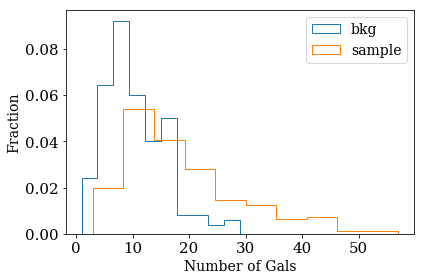

In [13]:
n_bkg = np.load('CUT_deep_catalogs/split_sfq_mass_data/total_count_aperture_bkg_allabove_9.0_0.6.npy')
n_sample = np.load('CUT_deep_catalogs/split_sfq_mass_data/total_count_aperture_sample_allabove_9.0_0.6.npy')
plt.hist(n_bkg,histtype='step',density=True,label='bkg')
plt.hist(n_sample,histtype='step',density=True,label='sample')
plt.xlabel('Number of Gals',fontsize=14)
plt.ylabel('Fraction',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('count_hist_deep.png')
plt.show()

## Relative Contribution of Errors

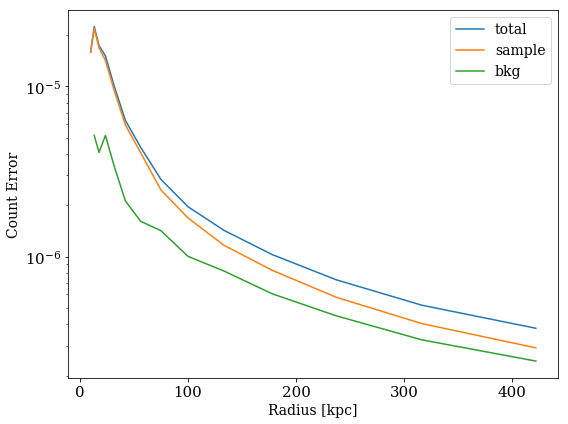

In [14]:
sigma_tot = np.load('CUT_deep_catalogs/split_sfq_mass_data/countDEEP_deep_allabove_9.0_0.6_err.npy')
sigma_sample = np.load('CUT_deep_catalogs/split_sfq_mass_data/countDEEP_deep_allabove_9.0_0.6_sample_err.npy')
sigma_bkg = np.load('CUT_deep_catalogs/split_sfq_mass_data/countDEEP_deep_allabove_9.0_0.6_bkg_err.npy')
bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')[:-1]

fig = plt.figure(figsize=(8, 6))
plt.plot(bin_edges,sigma_tot,label='total')
plt.plot(bin_edges,sigma_sample,label='sample')
plt.plot(bin_edges,sigma_bkg,label='bkg')
plt.yscale('log')
plt.xlabel('Radius [kpc]',fontsize=14)
plt.ylabel('Count Error',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('sigma_relative_contribution.png')
plt.show()